<a href="https://colab.research.google.com/github/hmahaseth17/ML_LungCancer/blob/main/Lung_Cancer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# import and read the data

filepath = "/content/drive/MyDrive/Colab_Notebooks/Lung_Cancer_project/Lung_Cancer.csv"
LC_data = pd.read_csv(filepath)


In [7]:
# overview of the data

#print(LC_data)
#LC_data.head()
#LC_data.info()
LC_data["cholesterol_level"].value_counts()
#LC_data.describe()

,count
cholesterol_level,
253,7839
246,7823
279,7822
287,7797
244,7789
...,...
212,4689
210,4687
151,4683


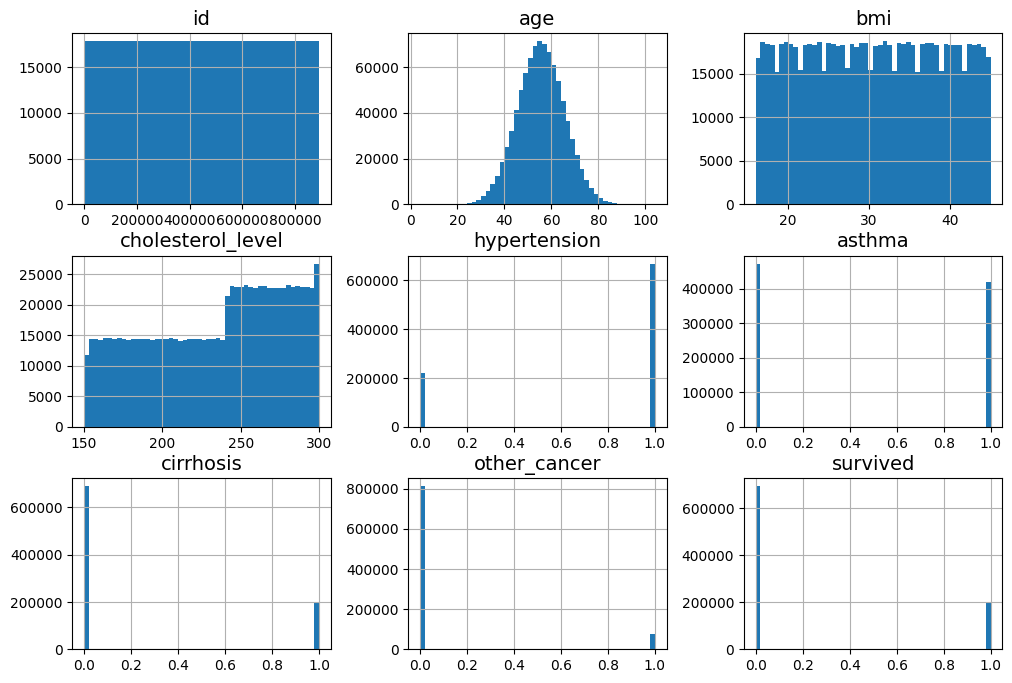

In [ ]:
# visulaize the data

# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

LC_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
# # seperating the train set and test set


# def shuffle_and_split_data(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# #can seperate into train, validate, and test set — I am going to do cross validation later

In [ ]:
# # testing if the train and test set seperated

# train_set, test_set = shuffle_and_split_data(LC_data, 0.2)
# print(len(train_set))
# print(len(test_set))


712000
178000


In [11]:
LC_data["clvl_cat"] = pd.cut(LC_data["cholesterol_level"],
                               bins=[125.0,160.0,245.0,290.0,np.inf],
                               labels=[1, 2,3,4])

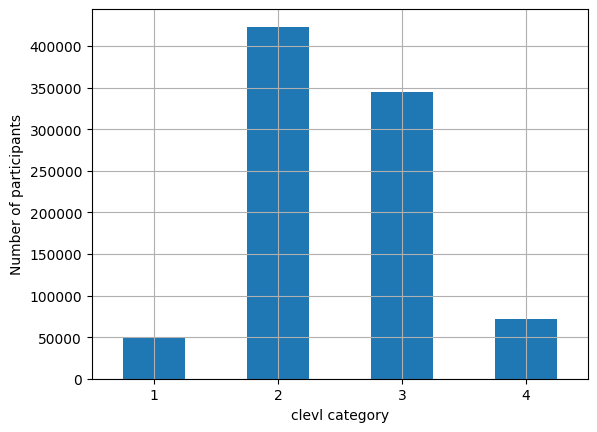

In [14]:
LC_data["clvl_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("clevl category")
plt.ylabel("Number of participants")
#save_fig("clvl vs participants plot")  # extra code
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(LC_data, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])